### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


In [100]:
student_name = "Ngoc Tram Tran"
student_id = "47753595"

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ds1 = '/content/drive/MyDrive/BA - Session 1 - 2024/COMP6200/Portfolio 1/The E-commerce Dataset.csv'

1.1 Display the dataframe

In [103]:
df1 = pd.read_csv(ds1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


In [104]:
print(df1)

       userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                                   eBay     5.0          2.0 

1.2 Counting number of Null values in each column (gender/rating/helpfulness/ review is 'none')

In [105]:
df1.isnull().sum()

# gender, rating, helpfulness
print("The missing values in columns of gender are" , df1['gender'].isna().sum())
print("The missing values in columns of rating are" , df1['rating'].isna().sum())
print("The missing values in columns of helpfulness are" , df1['helpfulness'].isna().sum())

missing_rows = df1[(df1.gender.isna() == True) | (df1.rating.isna()) | (df1.helpfulness.isna() == True)]


# review is 'none'
review_none_rows = df1[df1.review == 'none']
print("The 'none' values in column of review are", len(review_none_rows))

The missing values in columns of gender are 27
The missing values in columns of rating are 17
The missing values in columns of helpfulness are 22
The 'none' values in column of review are 18


1.3 Print the length of the data

In [106]:
# Before remove
print("The original data has", len(df1), "rows")

The original data has 20000 rows


In [107]:
# Remove the data
remove_index = missing_rows.index.union(review_none_rows.index)
print('In combine, there are', len(remove_index), 'rows needed to be removed')
df1_clean = df1.drop(index=remove_index)
print('Data after removal has', len(df1_clean), 'rows')

In combine, there are 84 rows needed to be removed
Data after removal has 19916 rows


1.4 Display the data frame after remove

In [108]:
print(df1_clean)

       userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                                   eBay     5.0          2.0 

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


2.1 Total number of unique users, unique reviews, unique items, and unique categories**

In [109]:
print('Total number is', df1_clean.nunique().sum())

print('Number of unique for each fields')
df1_clean.nunique()

Total number is 30626
Number of unique for each fields


userId          8562
timestamp       2283
review         19459
item              89
rating             5
helpfulness        5
gender             2
category           9
item_id           89
item_price        83
user_city         40
dtype: int64

Q2.2 Descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records**

In [110]:
df1_clean['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Q2.3 Descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders**

In [111]:
# group number of ratings by userId
items_by_user = df1_clean[['item','userId','gender']].groupby(by=['userId','gender']).count().reset_index().sort_values(by='item')
print('Number of item review by each user')
items_by_user.head()

Number of item review by each user


,userId,gender,item
4280,6136,M,1
4928,6831,M,1
4927,6830,F,1
4924,6827,M,1
4923,6826,F,1


In [112]:
# descriptive statistics for both genders
print('Descriptive statistic for each genders')
items_by_user.groupby('gender').item.describe()

Descriptive statistic for each genders


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,4233.0,2.313489,2.490008,1.0,1.0,1.0,3.0,34.0
M,4329.0,2.338415,2.617093,1.0,1.0,1.0,3.0,45.0


Q2.4 Descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items**

In [113]:
## number of rating received by each items
rating_by_item = df1_clean[['item','rating']].groupby(by=['item']).count().reset_index().sort_values(by='rating')
print('Number of rating correspond to each item')
rating_by_item

Number of rating correspond to each item


,item,rating
25,FOX,139
48,Northwest Airlines,141
8,Applebee's,141
77,The Legend Of Zelda Ocarina Of Time for Ninten...,143
34,How the Grinch Stole Christmas,143
...,...,...
46,NetZero,350
41,McDonald's,415
88,eBay,596
1,All Advantage,657


In [114]:
## descriptive statistics for number of ratings
print('Descriptive statistic for number of rating for each items')
rating_by_item['rating'].describe().round(3)

Descriptive statistic for number of rating for each items


count     89.000
mean     223.775
std      116.419
min      139.000
25%      162.000
50%      187.000
75%      245.000
max      939.000
Name: rating, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

3.1 Correlation between gender and ratings

In [115]:
corr_matrix = df1_clean.corr().round(4)
corr_matrix

<ipython-input-115-4e65ef11af26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1_clean.corr().round(4)


,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
userId,1.0000,0.0154,-0.0092,-0.0438,0.0065,-0.0185,-0.0086
timestamp,0.0154,1.0000,-0.0210,-0.0664,0.0415,0.0082,0.0056
rating,-0.0092,-0.0210,1.0000,-0.0003,0.0679,0.0152,-0.0099
helpfulness,-0.0438,-0.0664,-0.0003,1.0000,-0.0157,0.0301,0.0148
item_id,0.0065,0.0415,0.0679,-0.0157,1.0000,-0.0670,-0.0100
item_price,-0.0185,0.0082,0.0152,0.0301,-0.0670,1.0000,0.0002
user_city,-0.0086,0.0056,-0.0099,0.0148,-0.0100,0.0002,1.0000


correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users?

In [116]:
corr_matrix["rating"]

userId        -0.0092
timestamp     -0.0210
rating         1.0000
helpfulness   -0.0003
item_id        0.0679
item_price     0.0152
user_city     -0.0099
Name: rating, dtype: float64

<ipython-input-37-92ffbdfcf7de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1_clean, x='gender', y='rating', palette = "YlGnBu")


Text(0.5, 1.0, 'Male and Female rating comparision')

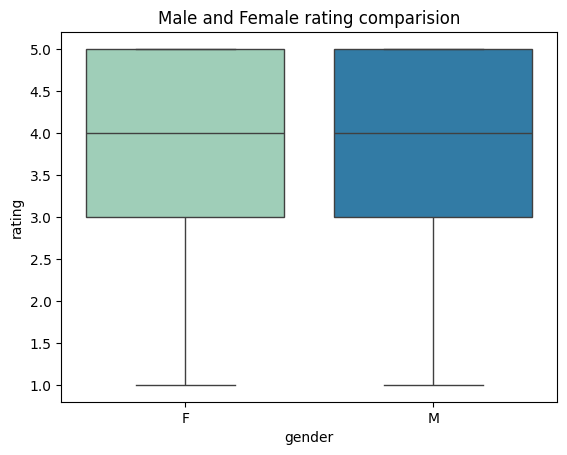

In [ ]:
# Boxplot correlation between gender and rating
sns.boxplot(data=df1_clean, x='gender', y='rating', palette = "YlGnBu")
plt.title('Male and Female rating comparision')

***EXPLANATION:***


1. The median line of all box plots are the same, at 4.0.
2. There is the similarity between median and mean, which mean these plots have symmetric distribution with no skewness.
3. The interquartile ranges of all box plots are also the same.
4. There is no outliers in the box plot.

In conclusion, there is no correlation between gender and rating in the dataset

3.2 Correlation between helpfulness and ratings

<ipython-input-117-38b4aa208cbe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1_clean, x='helpfulness', y='rating',palette = "YlGnBu")


Text(0.5, 1.0, 'Correlation Helpfulness - Rating in df1(E-Commerce) dataset')

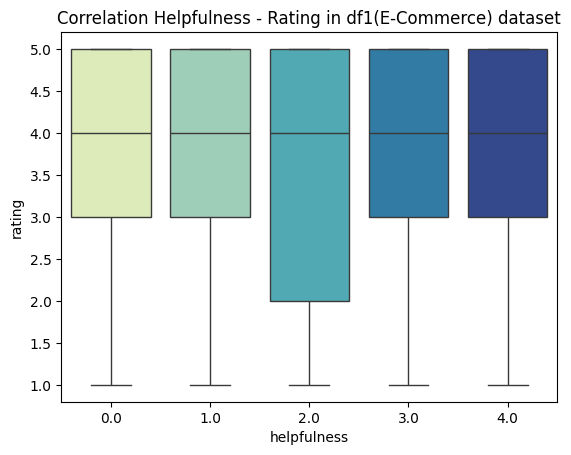

In [117]:
sns.boxplot(data=df1_clean, x='helpfulness', y='rating',palette = "YlGnBu")
plt.title('Correlation Helpfulness - Rating in df1(E-Commerce) dataset')

***EXPLANATION:***


1. The median line of all box plots are the same, at 4.0.
2. The mean line is also similar to the median one, showing the symmetric distribution with no heavy skewness.
3. The interquartile ranges of box plots 0.0, 1.0, 3.0 and 4.0 are the same, while that of 2.0 is larger than the rest. This indicates that the box plot of 2.0 has wider distribution, in other words, more scattered data.
4. There is no outliers in the box plot.

In conclusion, there is no impact of perception of helpfulness on ratings.

3.3 Correlation between category and ratings

<ipython-input-118-d3aa86772683>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1_clean, x='category', y='rating', palette = "YlGnBu")


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Online Stores & Services'),
  Text(1, 0, 'Movies'),
  Text(2, 0, 'Restaurants & Gourmet'),
  Text(3, 0, 'Personal Finance'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Hotels & Travel'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Games'),
  Text(8, 0, 'Books')])

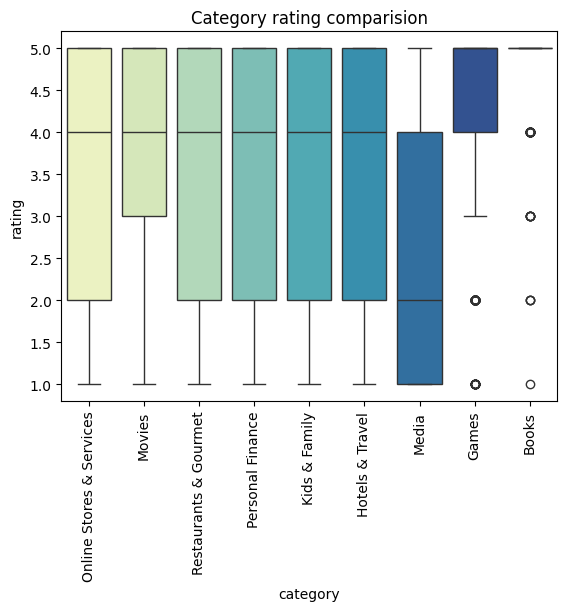

In [118]:
# correlation between category and rating
sns.boxplot(data=df1_clean, x='category', y='rating', palette = "YlGnBu")
plt.title('Category rating comparision')
plt.xticks(rotation=90)

***EXPLANATION:***


1. The median line all box plots are the same (at 4.0), except the box plot of Media, Games and Books, which are totally different.
2. The mean line is similar to the median, leading to symmetric distribution without heavy skewness.
3. The interquartile range of box plots Books is smallest, followed by the Games and Media respectively, while the rest have the same interquartile ranges.
4. The box plot of Books has more outliers than Games, whereas there is no outliers for other box plots. Moreover, Books is the highest rated category among the categories given with the lowest outliers.

In conclusion, while satisfaction is typically high, certain categories exhibit more variability and may benefit from targeted improvements to address the concerns of dissatisfied customers.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [119]:
# print the length of data before remove outliers
print('Length of data before remove outliers', len(df1_clean))

Length of data before remove outliers 19916


4.1 Reviews of which the helpfulness is no more than 2

In [120]:
removed_helpless_reviews = df1_clean.drop(df1_clean[df1_clean['helpfulness']<= 2.0].index)
print(removed_helpless_reviews)

       userId  timestamp                            review  \
2          33      12700     AOL..I love you!!!!!!!!!!!!     
3          33      21000      EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300   Blair Witch...Oh Come On.......   
6          33      32100         Go down under Mateys!!!!!   
9        4053      22304              The best on the web.   
...       ...        ...                               ...   
19992   10805      11900                             R.I.P   
19993   10805      12000                  Leave them be...   
19994   10805      50500      Thank you, Drive Thru Please   
19995   10805      50600         The Upper Class Fast Food   
19997   10806      82201  Excellent steak for a good price   

                       item  rating  helpfulness gender  \
2      AOL (America Online)     5.0          4.0      F   
3                      eBay     5.0          4.0      F   
4       Blair Witch Project     1.0          4.0      F   
6        Outback St

In [121]:
removed_helpless_reviews.helpfulness.describe().head()

count    13643.000000
mean         3.749249
std          0.433461
min          3.000000
25%          3.000000
Name: helpfulness, dtype: float64

4.2 Users who rate less than 7 items

In [122]:
# Count the number of items rated by each user
userId_count = removed_helpless_reviews.groupby("userId")['rating'].count()
print(userId_count)

# Identify users who rated 7 or more items
filtered_userId = userId_count[userId_count >= 7].index.tolist()


# Filter the original dataset to keep only records from these users
removed_usersId = removed_helpless_reviews[removed_helpless_reviews['userId'].isin(filtered_userId)]

userId
0        3
1        1
2        2
3        2
4        7
        ..
10802    2
10803    1
10804    1
10805    4
10806    1
Name: rating, Length: 6535, dtype: int64


In [123]:
removed_usersId[['item','userId',]].groupby(by=['userId',]).count().reset_index().sort_values(by='item').item.describe()

count    267.000000
mean      10.265918
std        4.410394
min        7.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       35.000000
Name: item, dtype: float64

4.3 Items that receives less than 11 ratings

In [124]:
# Count the number of items rated by each user
items_count = removed_usersId.groupby("item")['rating'].count()
print(userId_count)

# Identify the items receive 11 ratings or more
filtered_items = items_count[items_count >= 11].index.tolist()

# Filter the original dataset to keep only records from these users
removed_items = removed_helpless_reviews[removed_helpless_reviews['userId'].isin(filtered_userId)][df_removed_reviewsanduserId['item'].isin(filtered_item)]

userId
0        3
1        1
2        2
3        2
4        7
        ..
10802    2
10803    1
10804    1
10805    4
10806    1
Name: rating, Length: 6535, dtype: int64


In [125]:
removed_items[['item','rating',]].groupby(by=['item',]).count().reset_index().sort_values(by='rating').rating.describe()

count    82.000000
mean     32.743902
std      15.475038
min      11.000000
25%      22.250000
50%      30.000000
75%      39.000000
max      93.000000
Name: rating, dtype: float64

FINAL RESULTS

In [126]:
print('Length of data after remove outliers', len(removed_items))
## output the final data to csv file
removed_items.to_csv('df1_data.csv')

Length of data after remove outliers 2685
